# Chapter 07 -- Pandas, Part2
 

## Topics Covered

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#SAS-Sort-Merge-with-by-group">SAS Sort Merge with by-group </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Inner-Join">Inner Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Right-Outer-Join">Right Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Left-Outer-Join">Left Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Full-Outer-Join">Full Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Full-Outer-Join-With-no-Matched-Keys">Full Outer Join with no Matched Keys </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Group-by:-split-apply-combine">Group by: split-apply-combine</a>
   

The usual pre-amble to get packages loaded into the namespace.

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame, Index
from IPython.display import Image

The display method() defined below is from the Python Data Science Handbook, by Jake VanderPlas, available <a href="http://shop.oreilly.com/product/0636920034919.do"> here </a>.  It is used to render DataFrames side-by-side for comparisons.

In [3]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## SAS Sort Merge with by-group

Start with the example data from SAS' Step-by-Step Programming with Base SAS software doc located <a href="https://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001304305.htm"> here</a> .  

Create the SAS data sets left and right.

````
    data left;
       length name $ 32;
       input name $ 1-25 age 27-28 gender $ 30;
       datalines;
    Gunter, Thomas            27 M
    Harbinger, Nicholas       36 M
    Benito, Gisela            32 F
    Rudelich, Herbert         39 M
    Sirignano, Emily          12 F
    Morrison, Michael         32 M
    Morrison, Michael         32 M
    Onieda, Jacqueline        31 F
    ;;;;

    data right;
       length name $ 32;
       input idnumber $ 1-11 name $ 13-40 salary;
       datalines;
    929-75-0218 Gunter, Thomas               27500
    446-93-2122 Harbinger, Nicholas          33900
    228-88-9649 Benito, Gisela               28000
    029-46-9261 Rudelich, Herbert            35000
    442-21-8075 Sirignano, Emily             5000
    321-82-5771 Valpolicella, Vino           88000
    ;;;;
````

The SAS log below shows how both data sets are sorted by 'name' and subsequently merged on this sort key.  If the keys from both tables match, then the observation is merged into a single observation in the output dataset.   

````
    34       proc sort data=left;
    35          by name;
    36       
    37       proc sort data=right;
    38          by name;
    39       
    40       data merge_both;
    41       merge left
    42             right;
    43          by name;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.merge_both" has 9 observation(s) and 5 variable(s)
````

Observations not matching in both input data sets are included and their values are set to missing as illustated in the SAS output below.

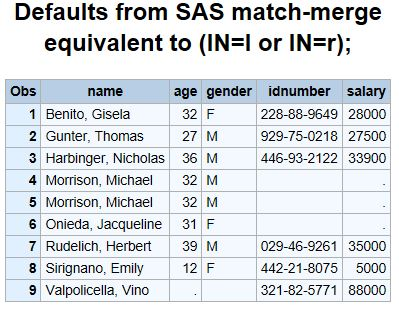

In [2]:
Image(filename='Anaconda3\\output\\default_match_merge.JPG')

The DataFrame 'left' contains demographic information for employees and the 'right' DataFrame contains salary information.  They are replicates of the SAS data sets 'left' and 'right' created from the SAS program above.

In [4]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000]})

In [5]:
display("left", "right")

,age,gender,name
0,27,M,"Gunter, Thomas"
1,36,M,"Harbinger, Nicholas"
2,32,F,"Benito, Gisela"
3,39,M,"Rudelich, Herbert"
4,22,F,"Sirignano, Emily"
5,32,M,"Morrison, Michael"
6,32,M,"Morrison, Michael"
7,31,F,"Onieda, Jacqueline"
,id,name,salary
0,929-75-0218,"Gunter, Thomas",27500


pandas use two main constructs for joing and mergeing dataframes.  There is the <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#merge-join-and-concatenate"> concat </a> function and the Database-style <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging"> join/merge </a> operations with syntax similar to SQL.

The examples below use the Database-style join/merge operations.

Now, consider the SAS log below.  We output 7 different data sets to examine how the last five of the output data sets are produced with panda.

````
    96       data left
    97            right
    98            both
    99            nomatchl
    100           nomatchr
    101           allrows
    102           nomatch;
    103       
    104       merge left(in=l)
    105             right(in=r);
    106          by name;
    107       
    108       if l = 1 then output left;
    109       if r = 1 then output right;
    110       if (l=l and r=1) then output both;
    111       if (l=0 and r=1) then output nomatchl;
    112       if (l=1 and r=0) then output nomatchr;
    113       if (l=1 or r=1) then output allrows;
    114       if (l=1 or r=1) then output nomatch;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.left" has 8 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.right" has 6 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.both" has 6 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatchl" has 1 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatchr" has 3 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.allrows" has 9 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatch" has 4 observation(s) and 5 variable(s)
````

## Inner Join
#### Only matching rows

An INNER JOIN selects only those rows whose key values are found in both tables.  Another way to say this is the intersection of key values.

With SAS, this is the eqivalent of:
    
    data both;
    merge left(in=l)
          right(in=r);
    by name;
    
    if (l=l and r=1) then output both;
    

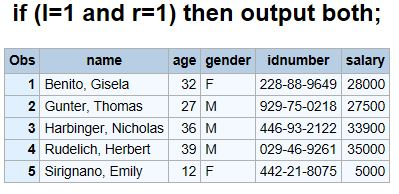

In [6]:
Image(filename='Anaconda3\\output\\match_in_both.JPG')

With the panda merge() method, how='inner' is the analog to the SAS example above.

The panda 'how' argument for the merge() method specifies which keys are to be included in the output table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NaN for missing.  This is the same as the SAS sort/merge example above. 

The indicator argument can be a column name which takes on 1 of 3 possible values:

    left_only
    right_only
    both
    
By applying a boolean filter in conjunction with these values, we can replicate the behaviors for the SAS IN= flag for MERGEs. 

For panda, use the how='inner' argument for an INNER JOIN.  This retrieves the intersection of key values from the 'left' and 'right' DataFrames.

In [7]:
both = pd.merge(left, right, on='name', how='inner', indicator='in=', sort=True)

In [8]:
both

,age,gender,name,id,salary,in=
0,32,F,"Benito, Gisela",228-88-9649,28000,both
1,27,M,"Gunter, Thomas",929-75-0218,27500,both
2,36,M,"Harbinger, Nicholas",446-93-2122,33900,both
3,39,M,"Rudelich, Herbert",029-46-9261,35000,both
4,22,F,"Sirignano, Emily",442-21-8075,5000,both


## Right Outer Join
### Not in Left and in Right

    With SAS, this is the eqivalent of:
    
        data nomatchl;
        merge left(in=l)
              right(in=r);
        by name;
    
        if (l=0 and r=1) then output nomatchl;

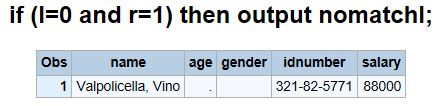

In [9]:
Image(filename='Anaconda3\\output\\nomatch_in_l.JPG')

For panda, use the how='right' argument for a RIGHT OUTER JOIN.  This uses only those key values found in the 'right' DataFrame.  

In [10]:
nomatchl = pd.merge(left, right, on='name', how='right', sort=True, indicator='in=')

In [11]:
nomatchl

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900,both
3,39.0,M,"Rudelich, Herbert",029-46-9261,35000,both
4,22.0,F,"Sirignano, Emily",442-21-8075,5000,both
5,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000,right_only


Chapter 05 discusses the use of boolean operators with the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> .loc indexer</a> as a filter mechanism. 

Another method for filtering is boolean indexes.  This enables the ability to determine which table contributed rows to the output table.  This is analogous to WHERE filtering for our 'left' and 'right' DataFrames.

In [12]:
nomatchl[nomatchl['in='] == 'right_only']

,age,gender,name,id,salary,in=
5,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000,right_only


## Left Outer Join
### In Left and not in Right

With SAS, this is the eqivalent of:
    
        data nomatchr;
        merge left(in=l)
              right(in=r);
        by name;
    
        if (l=1 and r=0) then output nomatchr;
        

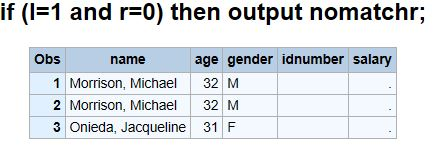

In [13]:
Image(filename='Anaconda3\\output\\nomatch_in_r.JPG')

For panda, use the how='left' argument for a LEFT OUTER JOIN.  This uses only those key values found in the left DataFrame.

In [14]:
nomatchl = pd.merge(left, right, on='name', how='left', sort=True, indicator='in=')

In [15]:
nomatchl

,age,gender,name,id,salary,in=
0,32,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32,M,"Morrison, Michael",NaN,NaN,left_only
4,32,M,"Morrison, Michael",NaN,NaN,left_only
5,31,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22,F,"Sirignano, Emily",442-21-8075,5000.0,both


Filter using the boolean filter for rows contributed by the 'left' DataFrame

In [16]:
nomatchl[nomatchl['in='] == 'left_only']

,age,gender,name,id,salary,in=
3,32,M,"Morrison, Michael",NaN,NaN,left_only
4,32,M,"Morrison, Michael",NaN,NaN,left_only
5,31,F,"Onieda, Jacqueline",NaN,NaN,left_only


## Full Outer Join
### In Left or in Right

This is the default behavior for a SAS 'Sort-Merge' with a by-group.  It combines all observations from both data sets together.  Or said another way, the UNION of key values from both tables.  This is equivalent to the first SAS example illustated above.

This is also the equivalent to setting the MERGE in= flag as:

    if (in=l or in=r) then output merge_both;

````
    34       proc sort data=left;
    35          by name;
    36       
    37       proc sort data=right;
    38          by name;
    39       
    40       data merge_both;
    41       merge left
    42             right;
    43          by name;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.merge_both" has 9 observation(s) and 5 variable(s)
````

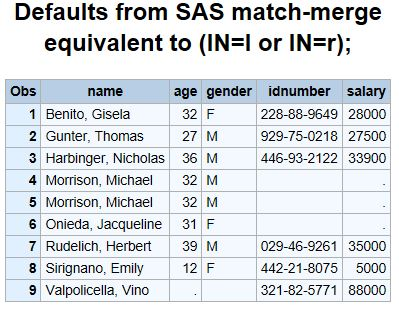

In [17]:
Image(filename='Anaconda3\\output\\default_match_merge.JPG')

In [18]:
merge_both = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

In [19]:
merge_both

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


## Full Outer Join With no Matched Keys
### Not in Left or Not in Right

With SAS, this is the eqivalent of:
    
        data nomatch;
        merge left(in=l)
              right(in=r);
        by name;
    
        if (l=0 or r=0) then output nomatch;
        

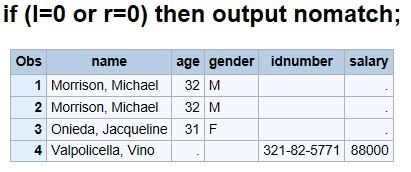

In [20]:
Image(filename='Anaconda3\\output\\merge_nomatch.JPG')

In [21]:
nomatch = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

In [22]:
nomatch

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Rows with unmatched keys are those rows with 'in=' values of left_only or right_only.  Alternatively, not in both.

In [23]:
nomatch[nomatch["in="] != 'both']

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


## Group by: split-apply-combine

In [24]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F'],
                     'status':       ['Pro', 'Amature', 'Amature', 'Pro', 'Amature', 'Amature', 'Pro', 'Pro']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000]})

Group by involves splitting data based on a criteria, creating a sub-population and applying a function to these groups.  Then we often combine these results into a single set of data.  Starting with a SAS-centric view, consider the program below as one such illustration.

To illustrate the capabilities of panda group by we add an additional column on the 'left' DataFrame 'status' which is an additional level we can use.

Execute a FULL OUTER JOIN to merge the 'left' and 'right' DataFrames togther.

In [25]:
df = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Drop the duplicate values for 'name'.  

In [26]:
df = df.drop_duplicates('name')

In [27]:
df

,age,gender,name,status,id,salary,in=
0,32.0,F,"Benito, Gisela",Amature,228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",Pro,929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",Amature,446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",Amature,NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",Pro,NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",Pro,029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",Amature,442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",NaN,321-82-5771,80000.0,right_only


Before we can utilize the newly created df DataFrame, we need to transform the missing salary information.  The additional .groupby example below displays the mean salary for the two levels of gender.

In [28]:
gb1 = df.groupby('gender')['salary'].mean()
gb1

gender
F    16500.000000
M    32133.333333
Name: salary, dtype: float64

Use PROC SQL to illustrate the same aggregation method (mean) for a group by (gender).  The \_null\_ data step is to print the values to the SAS log.

````
    30       proc sql;
    31          create table sal_by_gender as
    32          select gender, mean(salary) as mean_sal
    33          from left as l,
    34               right as r
    35          where l.name = r.name
    36          group by gender;
    NOTE: Data set "WORK.sal_by_gender" has 2 observation(s) and 2 variable(s)
    37       quit;
    38       
    39       data _null_;
    40          set sal_by_gender;
    41          put _all_;

    _N_=1 _ERROR_=0 gender=F mean_sal=16500
    _N_=2 _ERROR_=0 gender=M mean_sal=32133.333333
````

The next x cells walk through a sequence of steps using the .transform method with the lambda function and .fillna() to replace missing salary values in the DataFrame with the grouped mean. That is, missing values for Females use the mean salary for females; likewise for males. 

Create the DataFrameGroupBy object from the 'gender' column.

In [30]:
gb2 = df.groupby('gender')
type(gb2)

pandas.core.groupby.DataFrameGroupBy

In [29]:
gb1.count()

2

Next, define a function using the lambda function which applies the .fillna() method for replacing missing values.  The arguement to .fillna is the mean() method.  More examples on handling and replacing missing data are located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Replacement"> here </a>

In [31]:
func = lambda x: x.fillna(x.mean())
type(func)

function

The function defined above is now used by the groupby.transform() method, in the case below gb2.transform.  gb2 is the 'gender' group.  This is analagous to the GROUP BY in the PROC SQL query above.

In [32]:
trans = gb2.transform(func)
type(trans)

pandas.core.frame.DataFrame

It turns out that with the steps used above, the lambda function used was applied for all ints and floats to replace missing values with their respective group mean.  Therefore we replace the original df DataFrame column 'salary' with the transformed 'salary' column belong to the 'trans' DataFrame.

In [33]:
df["salary"] = trans["salary"]
df["salary"]

0    28000.000000
1    27500.000000
2    33900.000000
3    32133.333333
5    16500.000000
6    35000.000000
7     5000.000000
8    80000.000000
Name: salary, dtype: float64

In [34]:
df

,age,gender,name,status,id,salary,in=
0,32.0,F,"Benito, Gisela",Amature,228-88-9649,28000.000000,both
1,27.0,M,"Gunter, Thomas",Pro,929-75-0218,27500.000000,both
2,36.0,M,"Harbinger, Nicholas",Amature,446-93-2122,33900.000000,both
3,32.0,M,"Morrison, Michael",Amature,NaN,32133.333333,left_only
5,31.0,F,"Onieda, Jacqueline",Pro,NaN,16500.000000,left_only
6,39.0,M,"Rudelich, Herbert",Pro,029-46-9261,35000.000000,both
7,22.0,F,"Sirignano, Emily",Amature,442-21-8075,5000.000000,both
8,NaN,NaN,"Valpolicella, Vino",NaN,321-82-5771,80000.000000,right_only


We can ask for multiple aggregation methods be applied to multiple columns.

In [36]:
gb3 = df.groupby(['gender', 'status'])

In [37]:
gb3['age', 'salary'].agg([np.std, np.mean])

age              salary              
                     std  mean           std          mean
gender status                                             
F      Amature  7.071068  27.0  16263.455967  16500.000000
       Pro           NaN  31.0           NaN  16500.000000
M      Amature  2.828427  34.0   1249.221980  33016.666667
       Pro      8.485281  33.0   5303.300859  31250.000000

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    